In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [3]:
data=pd.read_csv('ML_Data_48.csv')

In [4]:
data=data.drop(['Z_jerk_mean', 'X_jerk_mean', 'total_jerk_mean', 'Y_jerk_mean','X_jerk_mean','X_jerk_min', 'X_min', 'timestamp_range', 'Y_mean', 'X_mean', 'X_max','Z_mean', 'X_jerk_max', 'X_jerk_range', 'X_range'], axis=1)

In [5]:
x=data.drop(['label'], axis=1)
y=data['label']

In [6]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.15, random_state=42)
x_train.shape, x_test.shape

((3174, 33), (561, 33))

In [7]:
scaled=StandardScaler()
x_train_s=scaled.fit_transform(x_train)
x_test_s=scaled.fit_transform(x_test)

In [8]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score

# Random Forest Classifier

In [9]:
model=RandomForestClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

0.9955891619407687

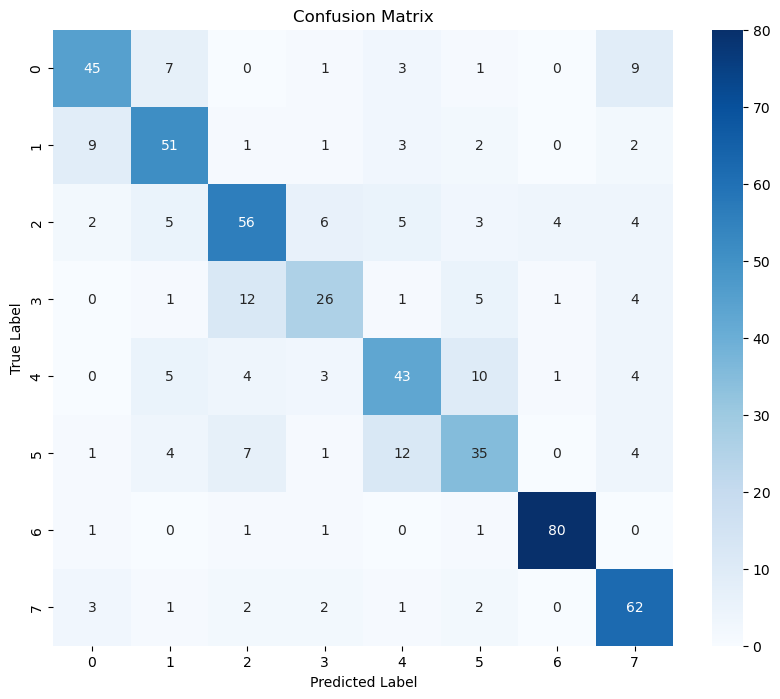

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71        66
           1       0.69      0.74      0.71        69
           2       0.67      0.66      0.67        85
           3       0.63      0.52      0.57        50
           4       0.63      0.61      0.62        70
           5       0.59      0.55      0.57        64
           6       0.93      0.95      0.94        84
           7       0.70      0.85      0.77        73

    accuracy                           0.71       561
   macro avg       0.70      0.70      0.69       561
weighted avg       0.71      0.71      0.71       561



In [10]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)

# Gradient Boosting

In [11]:
model=GradientBoostingClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

0.9410838059231253

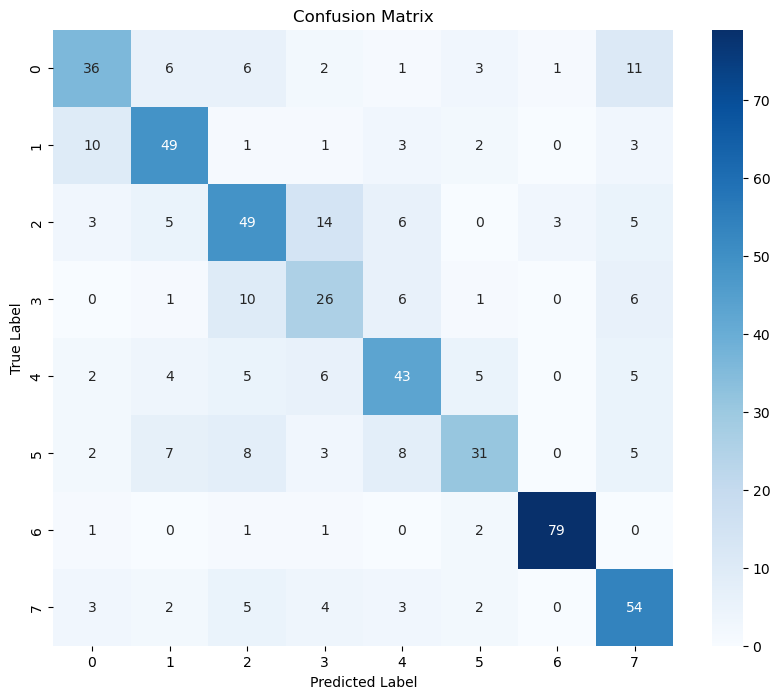

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.55      0.59        66
           1       0.66      0.71      0.69        69
           2       0.58      0.58      0.58        85
           3       0.46      0.52      0.49        50
           4       0.61      0.61      0.61        70
           5       0.67      0.48      0.56        64
           6       0.95      0.94      0.95        84
           7       0.61      0.74      0.67        73

    accuracy                           0.65       561
   macro avg       0.65      0.64      0.64       561
weighted avg       0.66      0.65      0.65       561



In [12]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)

# LGBM

In [13]:
model=LGBMClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8055
[LightGBM] [Info] Number of data points in the train set: 3174, number of used features: 33
[LightGBM] [Info] Start training from score -2.149245
[LightGBM] [Info] Start training from score -2.216309
[LightGBM] [Info] Start training from score -2.032063
[LightGBM] [Info] Start training from score -2.307006
[LightGBM] [Info] Start training from score -1.806998
[LightGBM] [Info] Start training from score -2.242665
[LightGBM] [Info] Start training from score -1.870385
[LightGBM] [Info] Start training from score -2.125212


0.9955891619407687

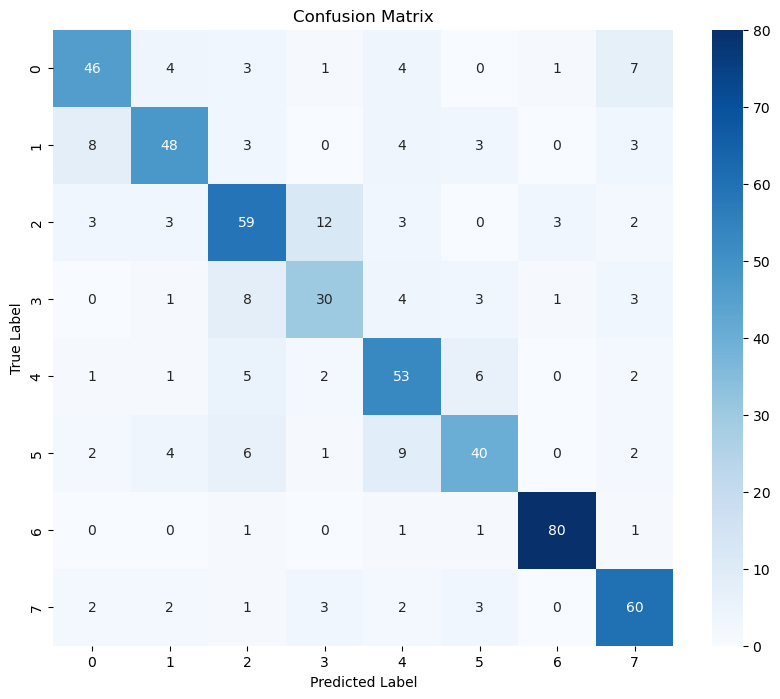

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        66
           1       0.76      0.70      0.73        69
           2       0.69      0.69      0.69        85
           3       0.61      0.60      0.61        50
           4       0.66      0.76      0.71        70
           5       0.71      0.62      0.67        64
           6       0.94      0.95      0.95        84
           7       0.75      0.82      0.78        73

    accuracy                           0.74       561
   macro avg       0.73      0.73      0.73       561
weighted avg       0.74      0.74      0.74       561



In [14]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)

# XGBoost

In [15]:
model=XGBClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

0.9955891619407687

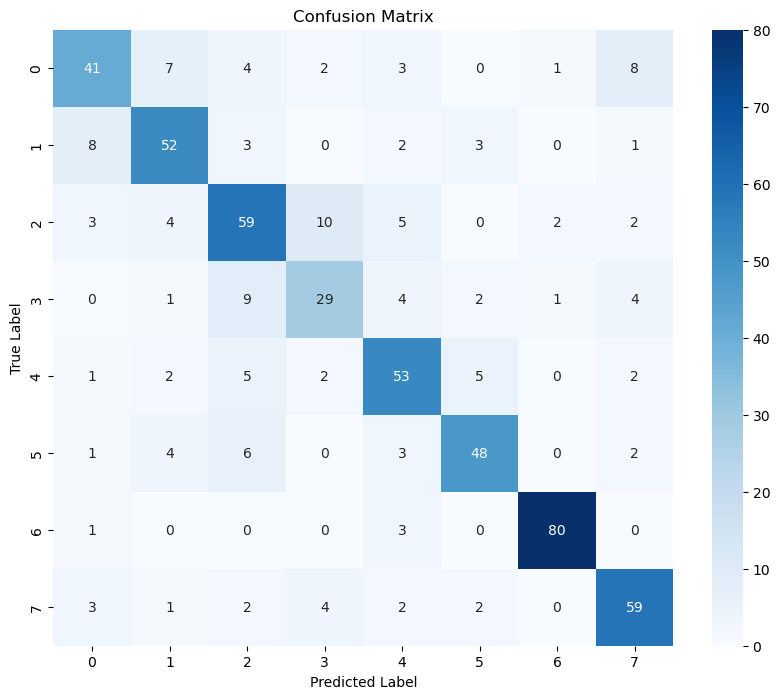

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.66        66
           1       0.73      0.75      0.74        69
           2       0.67      0.69      0.68        85
           3       0.62      0.58      0.60        50
           4       0.71      0.76      0.73        70
           5       0.80      0.75      0.77        64
           6       0.95      0.95      0.95        84
           7       0.76      0.81      0.78        73

    accuracy                           0.75       561
   macro avg       0.74      0.74      0.74       561
weighted avg       0.75      0.75      0.75       561



In [16]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)

# HistGradient Boosting

In [17]:
model=HistGradientBoostingClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

0.9955891619407687

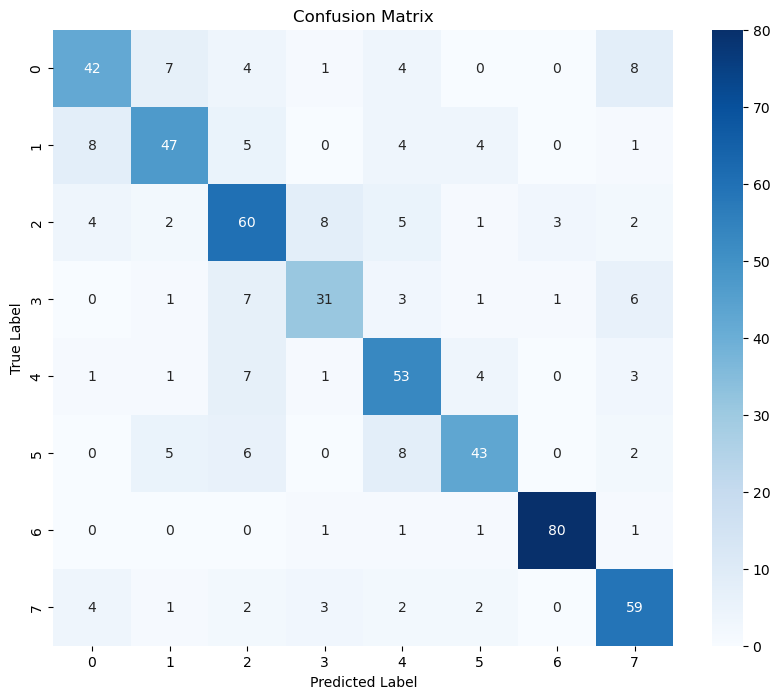

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.64      0.67        66
           1       0.73      0.68      0.71        69
           2       0.66      0.71      0.68        85
           3       0.69      0.62      0.65        50
           4       0.66      0.76      0.71        70
           5       0.77      0.67      0.72        64
           6       0.95      0.95      0.95        84
           7       0.72      0.81      0.76        73

    accuracy                           0.74       561
   macro avg       0.74      0.73      0.73       561
weighted avg       0.74      0.74      0.74       561



In [18]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)